# Test randUP: compare uniform with beta distribution

In [106]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import time

import sys, os
sys.path.append('../..')
from models.freeflyer_linear import Model
import utils

from scipy.spatial import ConvexHull

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Model + True Dynamics + Problem + Nominal Trajectory

In [107]:
# model + init
model = Model()
model.reset()
x_init = np.array([0.4,-0.3,0.0,0,0,0])+1e-6

[freeflyer_linear::__init__] Initializing freeflyer Model 
                             (linear, uncertain mass and inertia).
[freeflyer_linear::reset] resetting mass, J, and deltas.
[freeflyer_linear::reset] resetting mass, J, and deltas.


In [108]:
# nominal traj example
X_nom = np.load('data/Xtraj.npy'); #np.save('data/Xtraj', Xtraj)
U_nom = np.load('data/Utraj.npy'); #np.save('data/Utraj', Utraj)
X_nom.shape

(6, 14)

## Propagate Uncertainty with Uniform distribution for disturbances

In [109]:
N_MC = 100

In [110]:
Xs, Us = model.simulate_batch(x_init, X_nom, U_nom,
                             N_MC = N_MC)
Xs_unif = Xs.copy()
Xs.shape

(100, 6, 14)

## Propagate Uncertainty with beta distribution for disturbances

In [111]:
Xs, Us = model.simulate_batch(x_init, X_nom, U_nom,
                             N_MC = N_MC, B_beta_pdf_disturbances=True)
Xs_beta = Xs.copy()
Xs.shape

(100, 6, 14)

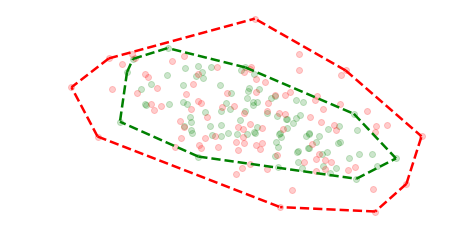

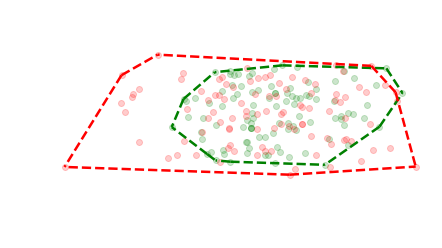

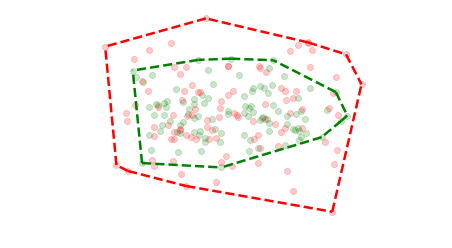

In [112]:
# Plot
from matplotlib import rc
from matplotlib import rcParams

k  = 10

for idx in [[0,1], [2,3], [4,5]]:
    # idx = [2,3]


    fig, ax = plt.subplots(figsize=(7, 4))
    plt.axis('off')

    plot_pts_2d(Xs_unif[:,:,k], idx=idx, alpha=0.2, color='g')
    plot_pts_2d(Xs_beta[:,:,k], idx=idx, alpha=0.2, color='r')


    hull_unif = ConvexHull(Xs_unif[:,idx,k])
    for simplex in hull_unif.simplices:
        plt.plot(Xs_unif[simplex, idx[0], k], Xs_unif[simplex, idx[1], k], 'g--', linewidth=2.5)

    hull_beta = ConvexHull(Xs_beta[:,idx,k])
    for simplex in hull_beta.simplices:
        plt.plot(Xs_beta[simplex, idx[0], k], Xs_beta[simplex, idx[1], k], 'r--', linewidth=2.5)


    # plt.text(xki[idx[0]]-0.14, xki[idx[1]]+0.07, '($\\bf{randUP}$)', color='g', fontsize=26)
    # plt.text(xki[idx[0]]+0.03, xki[idx[1]]+0.1, '($\\bf{robUP!}$)', color='r', fontsize=26, rotation=-20)